### Loading Packages

In [3]:
import pandas as pd
from utils import custom_info
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


## Part A: Load the endline data.

In [2]:
endline_df = pd.read_stata('endline.dta')

### We can observe totformalborrow_24, totinformalborrow_24, hhinc parameters have Null Values

In [3]:
custom_info(endline_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4160 entries, 0 to 4159
Data columns (total 7 columns):
                      Non-Null Count Null Count Unique Values    Dtype
Column                                                                
hhid                            4160          0          4160  float64
group_id                        4160          0           101  float32
totformalborrow_24              2939       1221           413   object
totinformalborrow_24            2621       1539           346   object
hhinc                           3916        244           802   object
hhnomembers                     4160          0            14     int8
survey_round                    4160          0             3   object
Total Rows                      4160                                  
memory usage: 187328 bytes


In [4]:
endline_df

,hhid,group_id,totformalborrow_24,totinformalborrow_24,hhinc,hhnomembers,survey_round
0,86.0,3.0,120000,69000,NaN,4,Endline II
1,147.0,96.0,NaN,300000,10700,4,Endline II
2,179.0,4.0,50000,96000,4300,5,Endline II
3,192.0,76.0,140000,NaN,NaN,2,Endline II
4,261.0,14.0,NaN,NaN,60000,7,Endline I
...,...,...,...,...,...,...,...
4155,185874.0,30.0,6000,NaN,10750,3,Endline III
4156,185875.0,44.0,NaN,NaN,7000,4,Endline III
4157,185876.0,32.0,NaN,NaN,NaN,3,Endline III
4158,185877.0,142.0,NaN,NaN,1000,2,Endline III


# Part B: Recode household debt and income variables as numeric values instead of strings, and replace "None" with Zero

In [5]:
cols_to_convert = ['totformalborrow_24', 'totinformalborrow_24', 'hhinc']

for col in cols_to_convert:
    endline_df[col] = pd.to_numeric(endline_df[col], errors='coerce')
    endline_df[col] = endline_df[col].fillna(0).astype(int)

In [6]:
endline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4160 entries, 0 to 4159
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   hhid                  4160 non-null   float64
 1   group_id              4160 non-null   float32
 2   totformalborrow_24    4160 non-null   int64  
 3   totinformalborrow_24  4160 non-null   int64  
 4   hhinc                 4160 non-null   int64  
 5   hhnomembers           4160 non-null   int8   
 6   survey_round          4160 non-null   object 
dtypes: float32(1), float64(1), int64(3), int8(1), object(1)
memory usage: 182.9+ KB


### We can see hhinc, totformalborrow_24, totalinformalborrow_24 follow skewed distribution, hence replacing with median is the best option, and also adding a column called hhinc_24 for 24 months income of the family (Assuming per month (30 days = 1 month) remains constant for 24 months

In [7]:
endline_df['hhinc_24'] = endline_df['hhinc'].fillna(0) * 24  

In [8]:
endline_df

,hhid,group_id,totformalborrow_24,totinformalborrow_24,hhinc,hhnomembers,survey_round,hhinc_24
0,86.0,3.0,120000,69000,0,4,Endline II,0
1,147.0,96.0,0,300000,10700,4,Endline II,256800
2,179.0,4.0,50000,96000,4300,5,Endline II,103200
3,192.0,76.0,140000,0,0,2,Endline II,0
4,261.0,14.0,0,0,60000,7,Endline I,1440000
...,...,...,...,...,...,...,...,...
4155,185874.0,30.0,6000,0,10750,3,Endline III,258000
4156,185875.0,44.0,0,0,7000,4,Endline III,168000
4157,185876.0,32.0,0,0,0,3,Endline III,0
4158,185877.0,142.0,0,0,1000,2,Endline III,24000


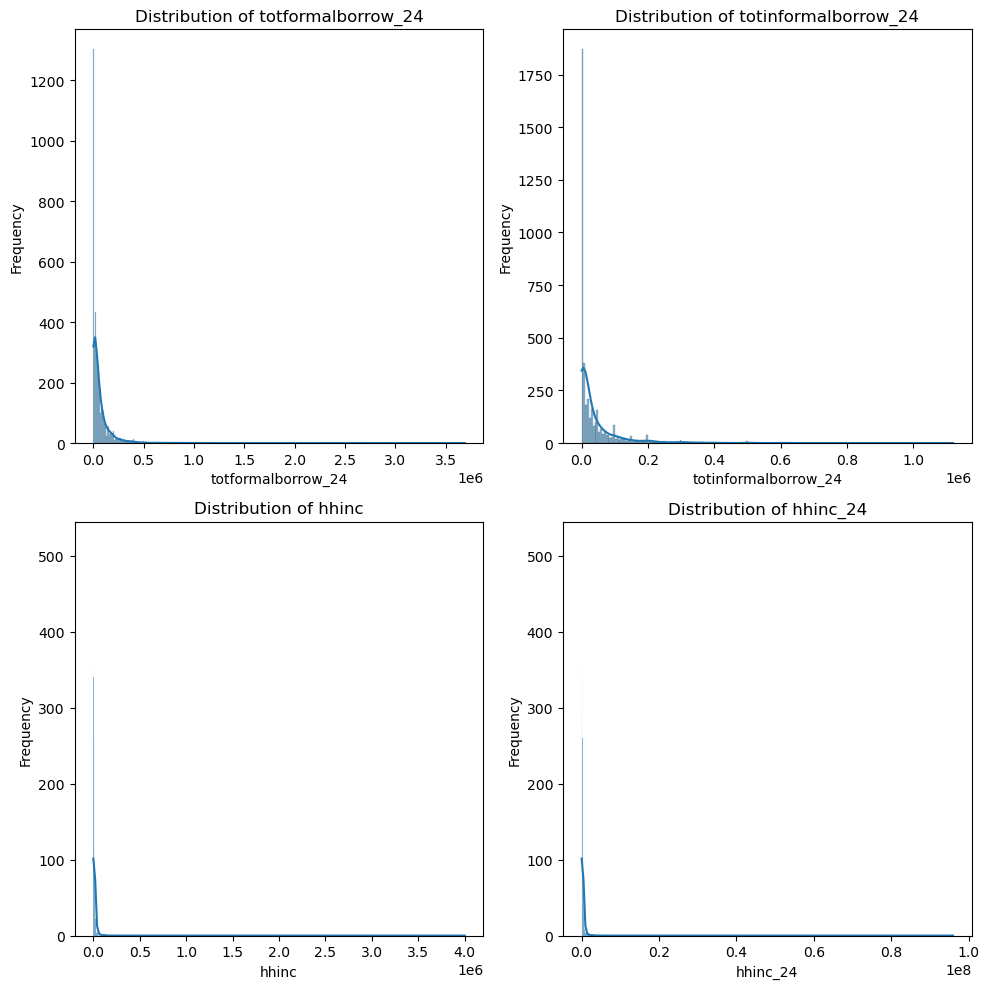

In [9]:
numeric_features = ['totformalborrow_24', 'totinformalborrow_24', 'hhinc','hhinc_24']
num_rows = 2
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))

axes = axes.flatten()

for i, feature in enumerate(numeric_features):
    sns.histplot(endline_df[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

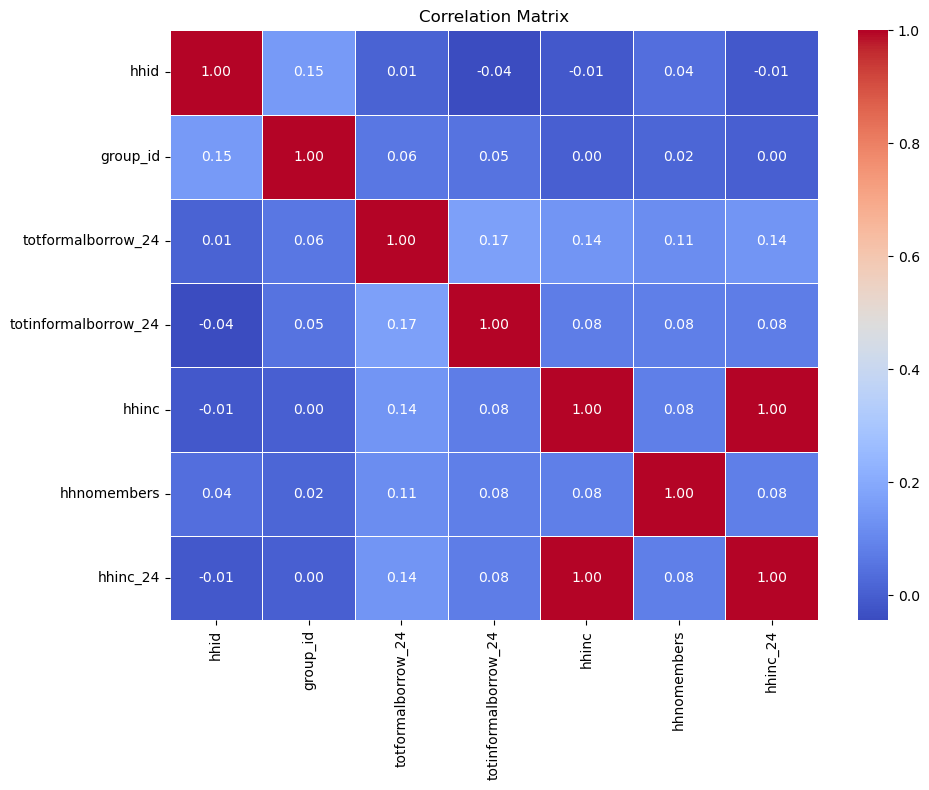

In [10]:
# Select only the numeric columns
numeric_cols = endline_df.select_dtypes(include=[np.number]).columns

# Create a new DataFrame with only the numeric columns
numeric_df = endline_df[numeric_cols]

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

### Now we have dataset which has imputation with the median and extra column hhinc_24

In [4]:
endline_df = pd.read_stata('endline.dta')

# Columns to convert and handle missing values
cols_to_convert = ['totformalborrow_24', 'totinformalborrow_24', 'hhinc']

# Convert columns to numeric and replace missing values with the median
for col in cols_to_convert:
    endline_df[col] = pd.to_numeric(endline_df[col], errors='coerce')
    median_value = endline_df[col].median()
    endline_df[col] = endline_df[col].fillna(median_value).astype(int)

# Create a new column 'hhinc_24' by multiplying 'hhinc' by 24
endline_df['hhinc_24'] = endline_df['hhinc'] * 24

In [68]:
custom_info(endline_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4160 entries, 0 to 4159
Data columns (total 8 columns):
                      Non-Null Count Null Count Unique Values    Dtype
Column                                                                
hhid                            4160          0          4160  float64
group_id                        4160          0           101  float32
totformalborrow_24              4160          0           412    int64
totinformalborrow_24            4160          0           345    int64
hhinc                           4160          0           801    int64
hhnomembers                     4160          0            14     int8
survey_round                    4160          0             3   object
hhinc_24                        4160          0           801    int64
Total Rows                      4160                                  
memory usage: 220608 bytes


In [41]:
endline_df.describe()

,hhid,group_id,totformalborrow_24,totinformalborrow_24,hhinc,hhnomembers,hhinc_24
count,4160.000000,4160.000000,4.160000e+03,4.160000e+03,4.160000e+03,4160.000000,4.160000e+03
mean,105520.079087,113.227402,7.904370e+04,5.200912e+04,1.219746e+04,4.514423,2.927390e+05
std,47127.152425,53.617245,1.219337e+05,8.054436e+04,6.737758e+04,1.855772,1.617062e+06
min,86.000000,1.000000,2.000000e+03,2.000000e+03,3.000000e+01,1.000000,7.200000e+02
25%,78535.250000,76.000000,3.487500e+04,2.000000e+04,3.400000e+03,3.000000,8.160000e+04
50%,114347.500000,133.000000,5.000000e+04,3.000000e+04,6.700000e+03,4.000000,1.608000e+05
75%,125841.000000,159.000000,7.500000e+04,4.500000e+04,1.100000e+04,6.000000,2.640000e+05
max,185878.000000,183.000000,3.690000e+06,1.120000e+06,4.000000e+06,16.000000,9.600000e+07


# Part 3: Browse the variables in this dataset, and write a few sentences about the financial status of households in this sample, supported by this data. Feel free to use a table or figure to support your argument. 

All households have a debt-to-income ratio greater than 1, indicating that their total borrowing over the past 24 months exceeds their total income over the same period. This suggests a high level of indebtedness relative to income, which could imply financial stress.

In [42]:
endline_df1 = endline_df.copy()

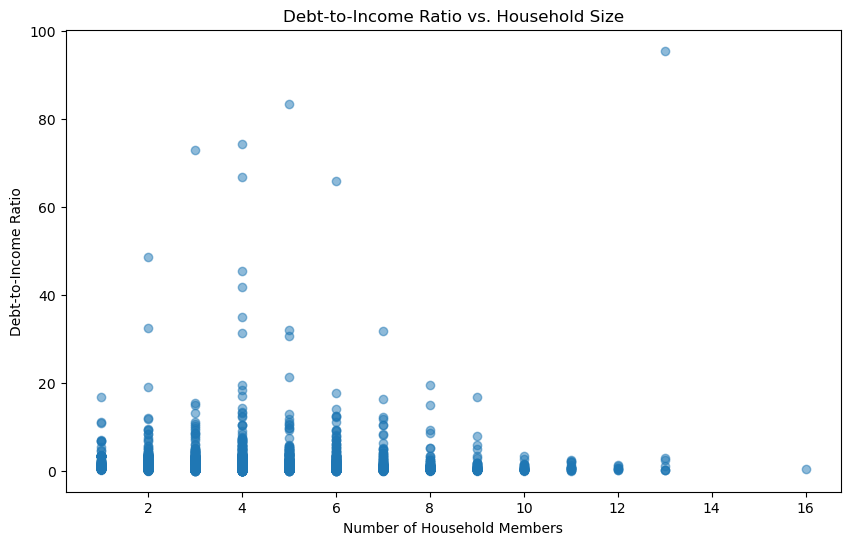

In [43]:
# Calculate total borrowed amount and normalize income to 24 months
endline_df1['total_borrowed'] = endline_df1['totformalborrow_24'] + endline_df1['totinformalborrow_24']
endline_df1['normalized_income'] = endline_df1['hhinc_24']

# Calculate debt-to-income ratio
endline_df1['debt_to_income_ratio'] = endline_df1['total_borrowed'] / endline_df1['normalized_income']

# Create a scatter plot of debt-to-income ratio vs. number of household members
plt.figure(figsize=(10, 6))
plt.scatter(endline_df1['hhnomembers'], endline_df1['debt_to_income_ratio'], alpha=0.5)
plt.xlabel('Number of Household Members')
plt.ylabel('Debt-to-Income Ratio')
plt.title('Debt-to-Income Ratio vs. Household Size')
plt.show()


The scatter plot provided illustrates the relationship between household size and the debt-to-income ratio for a sample of households. From the plot, we can observe several trends and points of interest:

1. **Decreasing Debt-to-Income Ratio with Larger Household Size**: There is a general trend where larger households, particularly those with 10 or more members, tend to have lower debt-to-income ratios. This could indicate that as households grow in size, they may benefit from economies of scale or have more potential income earners, which helps in managing and reducing relative debt levels.

2. **Variability in Smaller Households**: Smaller households, especially those with 2 to 6 members, display a wide range of debt-to-income ratios, with some households experiencing very high ratios, well above 20. This variability suggests that financial health in smaller households is less consistent and possibly more vulnerable to fluctuations in income or unexpected expenses.

3. **Presence of High Debt-to-Income Ratios**: There are several outliers with extremely high debt-to-income ratios across different household sizes. These outliers indicate that some households, regardless of size, may be facing significant financial stress, with debt levels that are disproportionately high compared to their income.

4. **Overall Financial Health**: While larger households appear to have a more favorable financial status based on their lower debt-to-income ratios, the presence of households with high ratios across all sizes indicates that financial challenges are not exclusive to any particular household size. It is important to consider that the debt-to-income ratio is just one aspect of financial health and other factors such as savings, assets, and expenses would also play a critical role in a comprehensive assessment.



In [44]:
def analyze_financial_status(df):
    df['totformalborrow_24'] = pd.to_numeric(df['totformalborrow_24'], errors='coerce')
    df['totinformalborrow_24'] = pd.to_numeric(df['totinformalborrow_24'], errors='coerce')
    df['hhinc_24'] = pd.to_numeric(df['hhinc_24'], errors='coerce')

    # Calculate total borrowed and adjust income for 24 months
    df['total_borrowed'] = df['totformalborrow_24'].fillna(0) + df['totinformalborrow_24'].fillna(0)
    df['adjusted_income'] = df['hhinc_24'].fillna(0) * 24

    # Calculate debt-to-income ratio
    df['debt_to_income_ratio'] = df['total_borrowed'] / df['adjusted_income'].replace(0, np.nan)
    
    num_ignored = df['debt_to_income_ratio'].isnull().sum()
    print(f"Number of values ignored while calculating debt-to-income ratio: {num_ignored}")


    # Summary statistics
    summary_stats = df[['debt_to_income_ratio', 'hhnomembers']].describe()

    # Plotting
    plt.figure(figsize=(10, 5))
    df['debt_to_income_ratio'].hist(bins=20)
    plt.title('Histogram of Debt-to-Income Ratios')
    plt.xlabel('Debt-to-Income Ratio')
    plt.ylabel('Frequency')
    plt.show()

    return summary_stats



Number of values ignored while calculating debt-to-income ratio: 0


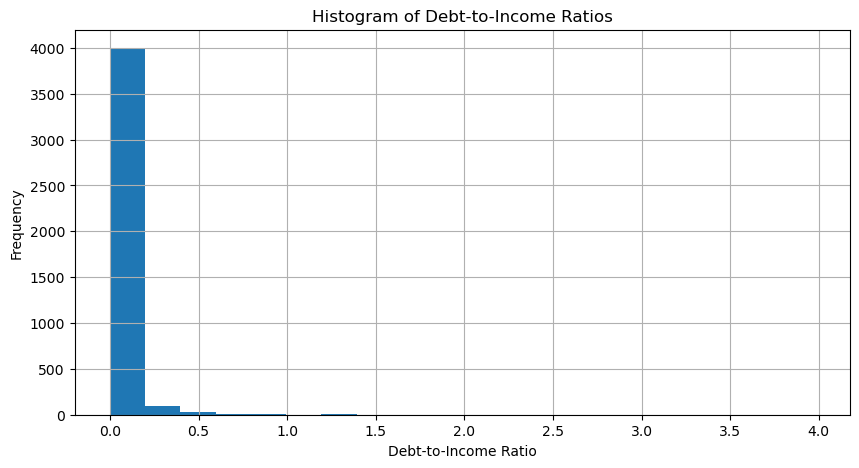

,debt_to_income_ratio,hhnomembers
count,4160.000000,4160.000000
mean,0.056169,4.514423
std,0.157901,1.855772
min,0.000100,1.000000
25%,0.012770,3.000000
50%,0.024034,4.000000
75%,0.052083,6.000000
max,3.975694,16.000000


In [26]:
analyze_financial_status(endline_df1)


## The mean debt-to-income ratio is approximately 0.056, which suggests that, on average, households have a debt amount that is just 5.6% of their income. This indicates a relatively low level of indebtedness across the sample as a whole.
## However, the standard deviation is about 0.158, which points to substantial variability in the financial burden among households. Some households have much higher debt-to-income ratios, which could signal financial stress.
## The minimum debt-to-income ratio is very close to zero, showing that some households have negligible debt. In contrast, the maximum ratio is nearly 4, indicating that at least one household has debt that is nearly four times its income, which is a sign of high financial distress.
## The median household size is 4 members, with half of the households having between 3 and 6 members. This suggests that the sample includes many medium-sized households.

Summary Statistics for Above Median or equal:
       debt_to_income_ratio  hhnomembers
count           2205.000000  2205.000000
mean               0.502004     4.798186
std                0.557768     1.818337
min                0.002396     1.000000
25%                0.204352     4.000000
50%                0.354167     5.000000
75%                0.588235     6.000000
max               12.157960    16.000000
Total number of households in Above Median or equal: 2205

Summary Statistics for Below Median:
       debt_to_income_ratio  hhnomembers
count           1955.000000  1955.000000
mean               2.302306     4.194373
std                5.338313     1.845925
min                0.057471     1.000000
25%                0.625000     3.000000
50%                1.111111     4.000000
75%                2.301136     5.000000
max               95.416667    13.000000
Total number of households in Below Median: 1955



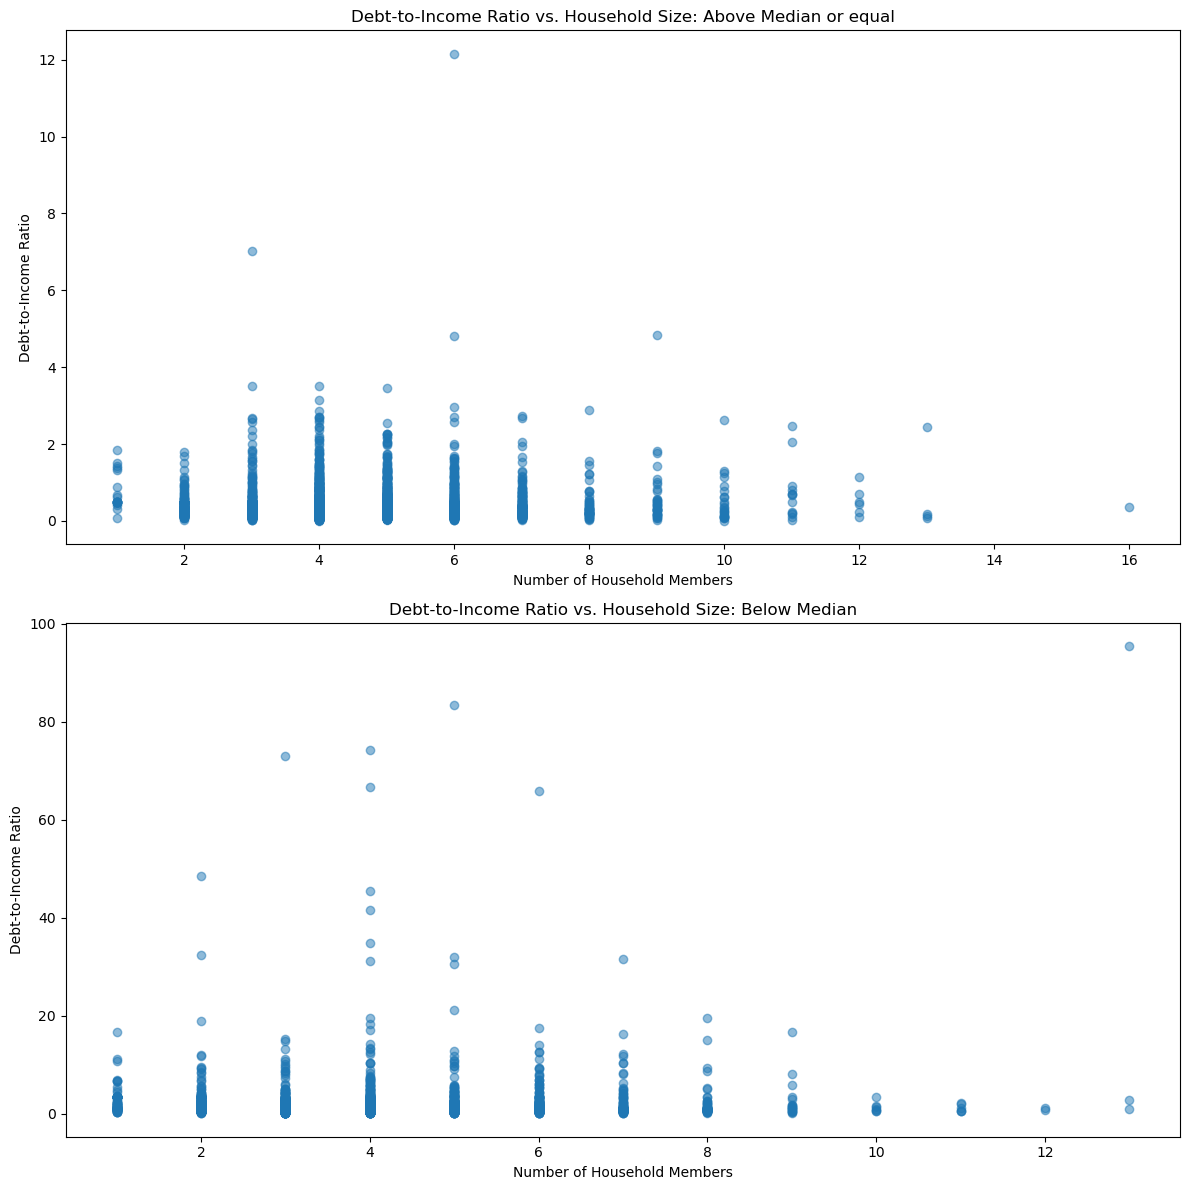

In [45]:
median_income = endline_df1['normalized_income'].median()
endline_df1['income_class'] = endline_df1['normalized_income'].apply(lambda x: 'Above Median or equal' if x >= median_income else 'Below Median')


num_rows = 2
num_cols = 1
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))


axes = axes.flatten()


for i, income_class in enumerate(['Above Median or equal', 'Below Median']):
    subset = endline_df1[endline_df1['income_class'] == income_class]
    axes[i].scatter(subset['hhnomembers'], subset['debt_to_income_ratio'], alpha=0.5)
    axes[i].set_title(f'Debt-to-Income Ratio vs. Household Size: {income_class}')
    axes[i].set_xlabel('Number of Household Members')
    axes[i].set_ylabel('Debt-to-Income Ratio')
    summary_stats = subset[['debt_to_income_ratio', 'hhnomembers']].describe()
    print(f"Summary Statistics for {income_class}:")
    print(summary_stats)
    print(f"Total number of households in {income_class}: {len(subset)}\n")

plt.tight_layout()
plt.show()

## For households above or equal to the median size, the average debt-to-income ratio is 0.502, which suggests that on average, the debt is approximately half of the income. This group has a relatively lower mean debt-to-income ratio and a standard deviation of 0.558, indicating moderate variability in financial burden among these households. The median household size is 5 members, and the range extends up to 16 members, which is the largest household size observed in the sample.
## In contrast, households below the median size have a significantly higher mean debt-to-income ratio of 2.302, indicating that on average, their debt is more than twice their income. This group exhibits a much higher standard deviation of 5.338, reflecting a greater disparity in the financial status among these households. The median household size is 4 members, with the range going up to 13 members.
## The scatter plots reinforce these findings, showing that households above or equal to the median size tend to have a cluster of lower debt-to-income ratios, whereas households below the median size display a wider spread of ratios, including some extreme values.
## larger households tend to have a more favorable financial status with lower debt relative to their income. In contrast, smaller households appear to face greater financial strain, with higher debt-to-income ratios indicating potential challenges in managing debt and maintaining financial stability.

# Part 4 and 5: Top code household debt and income variables, replacing all values greater than three standard deviations above the mean with a value that is equal to three standard deviations and Label the new top-coded variables.

# This process helps to manage outliers in my data that can skew analysis.

In [5]:
# Variables to top code
columns_to_top_code = ['totformalborrow_24', 'totinformalborrow_24', 'hhinc', 'hhinc_24']

for column in columns_to_top_code:
    mean = endline_df[column].mean()
    std_dev = endline_df[column].std()
    cutoff = mean + 3 * std_dev
    top_coded_label = column + '_top_coded'
    endline_df[top_coded_label] = np.where(endline_df[column] > cutoff, cutoff, endline_df[column])

In [70]:
endline_df

,hhid,group_id,totformalborrow_24,totinformalborrow_24,hhinc,hhnomembers,survey_round,hhinc_24,totformalborrow_24_top_coded,totinformalborrow_24_top_coded,hhinc_top_coded,hhinc_24_top_coded
0,86.0,3.0,120000,69000,6700,4,Endline II,160800,120000.0,69000.000000,6700.0,160800.0
1,147.0,96.0,50000,300000,10700,4,Endline II,256800,50000.0,293642.188493,10700.0,256800.0
2,179.0,4.0,50000,96000,4300,5,Endline II,103200,50000.0,96000.000000,4300.0,103200.0
3,192.0,76.0,140000,30000,6700,2,Endline II,160800,140000.0,30000.000000,6700.0,160800.0
4,261.0,14.0,50000,30000,60000,7,Endline I,1440000,50000.0,30000.000000,60000.0,1440000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4155,185874.0,30.0,6000,30000,10750,3,Endline III,258000,6000.0,30000.000000,10750.0,258000.0
4156,185875.0,44.0,50000,30000,7000,4,Endline III,168000,50000.0,30000.000000,7000.0,168000.0
4157,185876.0,32.0,50000,30000,6700,3,Endline III,160800,50000.0,30000.000000,6700.0,160800.0
4158,185877.0,142.0,50000,30000,1000,2,Endline III,24000,50000.0,30000.000000,1000.0,24000.0


### Usually z-score = 3 is considered as a cut-off value to set the limit. Therefore, any z-score greater than +3 or less than -3 is considered as outlier 

In [6]:
numeric_features = ['totformalborrow_24', 'totinformalborrow_24', 'hhinc', 'hhinc_24', 
                    'totformalborrow_24_top_coded', 'totinformalborrow_24_top_coded', 
                    'hhinc_top_coded', 'hhinc_24_top_coded']

for feature in numeric_features:
    z_scores = stats.zscore(endline_df[feature])

    outliers = endline_df[(z_scores < -3) | (z_scores >= 3)]
    num_outliers = len(outliers)
    
    # Print the feature name and the number of outliers
    print(f"Feature: {feature}")
    print(f"Number of outliers: {num_outliers}")
    print("---")

Feature: totformalborrow_24
Number of outliers: 55
---
Feature: totinformalborrow_24
Number of outliers: 95
---
Feature: hhinc
Number of outliers: 9
---
Feature: hhinc_24
Number of outliers: 9
---
Feature: totformalborrow_24_top_coded
Number of outliers: 133
---
Feature: totinformalborrow_24_top_coded
Number of outliers: 145
---
Feature: hhinc_top_coded
Number of outliers: 69
---
Feature: hhinc_24_top_coded
Number of outliers: 69
---


# Part H: Write a few sentences about why we might want to top code these types of survey responses from households, and give an example of another data quality or cleaning check

1. **Check for Outliers:**
    - Identify outliers in numeric features using statistical methods (e.g., IQR, Z-score).
    - Decide on the appropriate treatment for outliers:
        - Remove outliers if they are deemed erroneous or influential.
        - Transform outliers using techniques like log transformation if they are not errors but affect model performance.

Reducing the impact of outliers: Extreme values, such as unusually high income or debt figures, can significantly skew statistical measures like the mean and standard deviation. By top coding these outliers, we can mitigate their influence on the overall analysis and obtain more representative results.

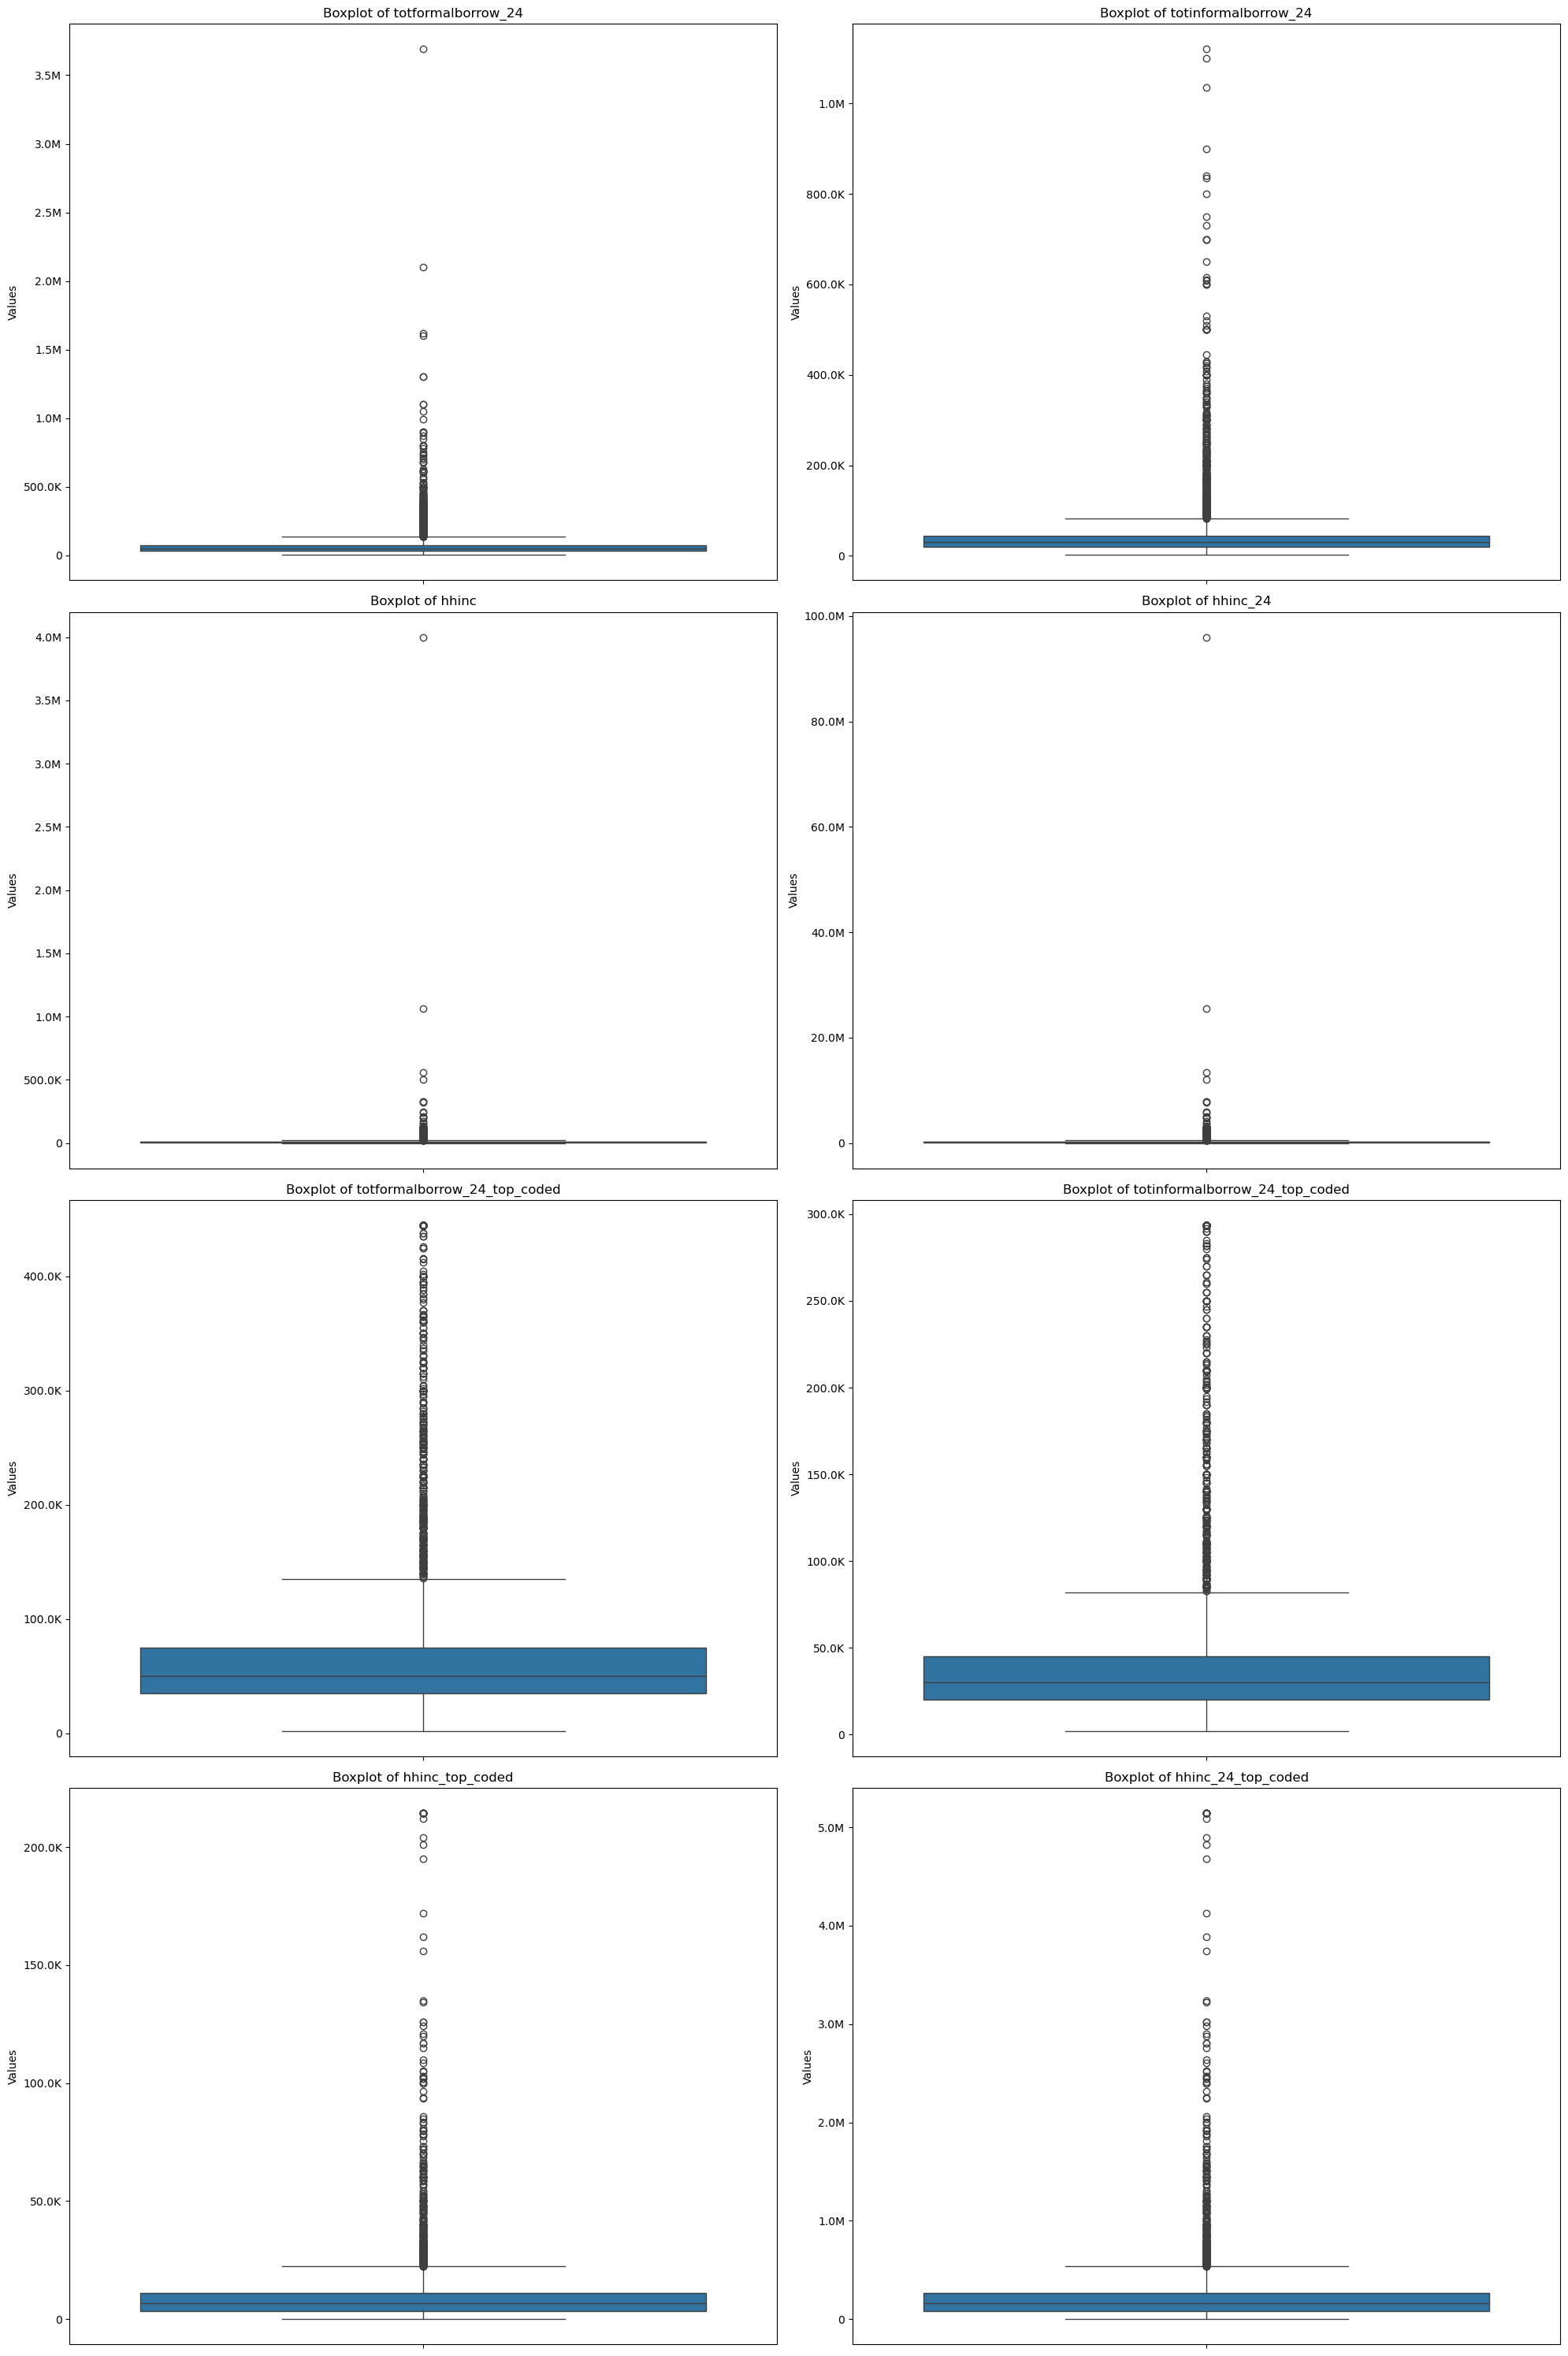

In [72]:
numeric_features = ['totformalborrow_24', 'totinformalborrow_24', 'hhinc', 'hhinc_24', 'totformalborrow_24_top_coded', 'totinformalborrow_24_top_coded', 'hhinc_top_coded', 'hhinc_24_top_coded']

num_rows = (len(numeric_features) + 1) // 2
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 30))

axes = axes.flatten()

def format_tick_labels(x, pos):
    if x >= 1e6:
        return f'{x / 1e6:.1f}M'
    elif x >= 1e3:
        return f'{x / 1e3:.1f}K'
    else:
        return f'{x:.0f}'

for i, feature in enumerate(numeric_features):
    sns.boxplot(data=endline_df[feature], ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature}')
    axes[i].set_ylabel('Values')
    axes[i].yaxis.set_major_formatter(ticker.FuncFormatter(format_tick_labels))

if len(numeric_features) % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

In [73]:
# Function to remove outliers based on IQR-score
def remove_outliers_iqr(data, numeric_features):
    outliers_indices = []
    for feature in numeric_features:
        Q1 = np.percentile(data[feature], 25)
        Q3 = np.percentile(data[feature], 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
        outliers_indices.extend(outliers.index)
    
    outliers_indices = list(set(outliers_indices))
    data_cleaned = data.drop(outliers_indices)
    return data_cleaned

data_cleaned = remove_outliers_iqr(endline_df.copy(), numeric_features)


In [78]:
data_cleaned 

,hhid,group_id,totformalborrow_24,totinformalborrow_24,hhinc,hhnomembers,survey_round,hhinc_24,totformalborrow_24_top_coded,totinformalborrow_24_top_coded,hhinc_top_coded,hhinc_24_top_coded
0,86.0,3.0,120000,69000,6700,4,Endline II,160800,120000.0,69000.0,6700.0,160800.0
8,450.0,76.0,15000,10000,1500,6,Endline II,36000,15000.0,10000.0,1500.0,36000.0
9,500.0,134.0,25000,30000,8940,6,Endline II,214560,25000.0,30000.0,8940.0,214560.0
10,554.0,122.0,15000,30000,10000,5,Endline I,240000,15000.0,30000.0,10000.0,240000.0
12,1129.0,57.0,16000,26450,7000,3,Endline II,168000,16000.0,26450.0,7000.0,168000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4155,185874.0,30.0,6000,30000,10750,3,Endline III,258000,6000.0,30000.0,10750.0,258000.0
4156,185875.0,44.0,50000,30000,7000,4,Endline III,168000,50000.0,30000.0,7000.0,168000.0
4157,185876.0,32.0,50000,30000,6700,3,Endline III,160800,50000.0,30000.0,6700.0,160800.0
4158,185877.0,142.0,50000,30000,1000,2,Endline III,24000,50000.0,30000.0,1000.0,24000.0


# PartG: Create a total borrowed amount variable that equals the sum of formal and informal borrowed amounts.

In [7]:
endline_df['total_borrowed_amount'] = endline_df['totformalborrow_24'] + endline_df['totinformalborrow_24']

In [8]:
endline_df

,hhid,group_id,totformalborrow_24,totinformalborrow_24,hhinc,hhnomembers,survey_round,hhinc_24,totformalborrow_24_top_coded,totinformalborrow_24_top_coded,hhinc_top_coded,hhinc_24_top_coded,total_borrowed_amount
0,86.0,3.0,120000,69000,6700,4,Endline II,160800,120000.0,69000.000000,6700.0,160800.0,189000
1,147.0,96.0,50000,300000,10700,4,Endline II,256800,50000.0,293642.188493,10700.0,256800.0,350000
2,179.0,4.0,50000,96000,4300,5,Endline II,103200,50000.0,96000.000000,4300.0,103200.0,146000
3,192.0,76.0,140000,30000,6700,2,Endline II,160800,140000.0,30000.000000,6700.0,160800.0,170000
4,261.0,14.0,50000,30000,60000,7,Endline I,1440000,50000.0,30000.000000,60000.0,1440000.0,80000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4155,185874.0,30.0,6000,30000,10750,3,Endline III,258000,6000.0,30000.000000,10750.0,258000.0,36000
4156,185875.0,44.0,50000,30000,7000,4,Endline III,168000,50000.0,30000.000000,7000.0,168000.0,80000
4157,185876.0,32.0,50000,30000,6700,3,Endline III,160800,50000.0,30000.000000,6700.0,160800.0,80000
4158,185877.0,142.0,50000,30000,1000,2,Endline III,24000,50000.0,30000.000000,1000.0,24000.0,80000


# Part H: Merge the endline data with the treatment_status dataset to assign a treatment status for each household

In [9]:
# Read the treatment_status dataset
treatment_status_df = pd.read_csv("treatment_status.csv")

# Merge the endline DataFrame with the treatment_status DataFrame
merge_df = pd.merge(endline_df, treatment_status_df, on="group_id", how="left")

In [10]:
merge_df

,hhid,group_id,totformalborrow_24,totinformalborrow_24,hhinc,hhnomembers,survey_round,hhinc_24,totformalborrow_24_top_coded,totinformalborrow_24_top_coded,hhinc_top_coded,hhinc_24_top_coded,total_borrowed_amount,pair_id,treated
0,86.0,3.0,120000,69000,6700,4,Endline II,160800,120000.0,69000.000000,6700.0,160800.0,189000,31,1
1,147.0,96.0,50000,300000,10700,4,Endline II,256800,50000.0,293642.188493,10700.0,256800.0,350000,14,0
2,179.0,4.0,50000,96000,4300,5,Endline II,103200,50000.0,96000.000000,4300.0,103200.0,146000,31,0
3,192.0,76.0,140000,30000,6700,2,Endline II,160800,140000.0,30000.000000,6700.0,160800.0,170000,5,0
4,261.0,14.0,50000,30000,60000,7,Endline I,1440000,50000.0,30000.000000,60000.0,1440000.0,80000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4155,185874.0,30.0,6000,30000,10750,3,Endline III,258000,6000.0,30000.000000,10750.0,258000.0,36000,28,1
4156,185875.0,44.0,50000,30000,7000,4,Endline III,168000,50000.0,30000.000000,7000.0,168000.0,80000,28,0
4157,185876.0,32.0,50000,30000,6700,3,Endline III,160800,50000.0,30000.000000,6700.0,160800.0,80000,32,1
4158,185877.0,142.0,50000,30000,1000,2,Endline III,24000,50000.0,30000.000000,1000.0,24000.0,80000,36,0


# Part i: Create a dummy variable for households that are below the poverty line using a daily per capita poverty line of 26.995 INR (which was equivalent to 1.90 USD at the time of data collection). Use the endline top coded “hhinc” variable, which contains self-reported household income over the past 30 days, in order to do this

In [11]:
poverty_line_per_day_per_person = 26.995

# Calculate daily household income from 'hhinc_top_coded' and divide by 'hhnomembers' to get per capita income
merge_df['daily_per_capita_income'] = (merge_df['hhinc_top_coded'] / 30) / merge_df['hhnomembers']

# Create a dummy variable for households below the poverty line # 0 - below poverty, 1 - above poverty
merge_df['below_poverty_line'] = (merge_df['daily_per_capita_income'] >= poverty_line_per_day_per_person).astype(int)

In [12]:
merge_df

,hhid,group_id,totformalborrow_24,totinformalborrow_24,hhinc,hhnomembers,survey_round,hhinc_24,totformalborrow_24_top_coded,totinformalborrow_24_top_coded,hhinc_top_coded,hhinc_24_top_coded,total_borrowed_amount,pair_id,treated,daily_per_capita_income,below_poverty_line
0,86.0,3.0,120000,69000,6700,4,Endline II,160800,120000.0,69000.000000,6700.0,160800.0,189000,31,1,55.833333,1
1,147.0,96.0,50000,300000,10700,4,Endline II,256800,50000.0,293642.188493,10700.0,256800.0,350000,14,0,89.166667,1
2,179.0,4.0,50000,96000,4300,5,Endline II,103200,50000.0,96000.000000,4300.0,103200.0,146000,31,0,28.666667,1
3,192.0,76.0,140000,30000,6700,2,Endline II,160800,140000.0,30000.000000,6700.0,160800.0,170000,5,0,111.666667,1
4,261.0,14.0,50000,30000,60000,7,Endline I,1440000,50000.0,30000.000000,60000.0,1440000.0,80000,1,0,285.714286,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4155,185874.0,30.0,6000,30000,10750,3,Endline III,258000,6000.0,30000.000000,10750.0,258000.0,36000,28,1,119.444444,1
4156,185875.0,44.0,50000,30000,7000,4,Endline III,168000,50000.0,30000.000000,7000.0,168000.0,80000,28,0,58.333333,1
4157,185876.0,32.0,50000,30000,6700,3,Endline III,160800,50000.0,30000.000000,6700.0,160800.0,80000,32,1,74.444444,1
4158,185877.0,142.0,50000,30000,1000,2,Endline III,24000,50000.0,30000.000000,1000.0,24000.0,80000,36,0,16.666667,0


# Part J: Write a few sentences about the strengths and limitations of using the dummy you created to assess a household’s poverty status. If you were able to collect more data from these households, what types of additional questions might you ask?

### Strengths of Using the Poverty Line Dummy Variable

#### The dummy variable for poverty status based on a daily per capita income threshold simplifies the analysis by converting a continuous income measure into a binary indicator, which is easy to interpret and use in statistical models. Using a standardized poverty line allows for comparisons across different studies and geographical areas. This can be particularly useful in policy analysis and international development research. The dummy variable directly addresses economic vulnerability and can be immediately useful for targeting and evaluating poverty alleviation programs. It helps in identifying the households most in need of support.

### Limitations of Using the Poverty Line Dummy Variable

### The dummy variable does not capture the depth or severity of poverty. Households significantly below the poverty line are treated the same as those just below it. It can be the case a rich household can be under huge debt whereas a poor household in very less debt. 
    
### Additional Data Collection Suggestions

1. **Expenditure Details**: What are the major areas of household expenditure? Understanding where money is spent can provide insights into household priorities and needs.

2. **Asset Ownership**: What assets (e.g., land, livestock, vehicles, appliances) does the household own? Assets are a critical component of household wealth and can provide a buffer against economic shocks which can tell their net worth.

3. **Access to Services**: Does the household have access to essential services such as clean water, sanitation, electricity, healthcare, and education? These factors are crucial for understanding living standards and well-being.

4. **Employment and Labor Information**: What types of employment do household members engage in? Are these jobs stable or seasonal? Information about employment can help assess economic stability and vulnerability.

5. **Education Levels**: What are the education levels of household members? Education is a key factor in long-term economic prospects and social mobility.


# Part K: Merge your working data with the baseline controls dataset, and save the merged data. If you need to make decisions about dropping mismatched values, please justify them in notes.

In [13]:
baseline_df = pd.read_stata('baseline_controls.dta')

In [14]:
baseline_df 

,hhid,group_id,hhnomembers,gender_hoh,age_hoh,educyears_hoh,readwrite_hoh,noclasspassed_hoh,higheduc_hoh,hhnomembers_above18,hhnomembers_below18,hhreg_muslim,hhreg_christian,hhcaste_fc,hhcaste_bc,hhcaste_mbc,hhcaste_sc_st
0,73.0,35.0,5,Female (0),30.0,10 years,1.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0
1,86.0,3.0,4,Male (1),55.0,10 years,1.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,179.0,4.0,5,Male (1),51.0,8 years,1.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,192.0,76.0,2,Male (1),57.0,12 years,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,261.0,14.0,7,Male (1),46.0,19+ years (Post-graduate),1.0,0.0,1.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4061,185362.0,120.0,4,Male (1),39.0,3-7 years (Classes 1-5),1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
4062,185417.0,120.0,4,Female (0),45.0,0 years,0.0,1.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
4063,185436.0,120.0,4,Female (0),34.0,14 years (Class 12/HSC),1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0
4064,185452.0,120.0,5,Female (0),51.0,0 years,0.0,1.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [16]:
common_columns = merge_df.columns.intersection(baseline_df.columns)
print("Common Columns:", common_columns)

Common Columns: Index(['hhid', 'group_id', 'hhnomembers'], dtype='object')


In [17]:
merged_data_inner = pd.merge(merge_df, baseline_df , on='hhid', how='inner')


### The inner join (how='inner') will keep only the rows that have matching 'hhid' values in both datasets. This means that if there are any 'hhid' values present in one dataset but not in the other, those rows will be excluded from the merged result. The common attribute between them is hhid

In [18]:
merged_data_inner

,hhid,group_id_x,totformalborrow_24,totinformalborrow_24,hhinc,hhnomembers_x,survey_round,hhinc_24,totformalborrow_24_top_coded,totinformalborrow_24_top_coded,...,noclasspassed_hoh,higheduc_hoh,hhnomembers_above18,hhnomembers_below18,hhreg_muslim,hhreg_christian,hhcaste_fc,hhcaste_bc,hhcaste_mbc,hhcaste_sc_st
0,86.0,3.0,120000,69000,6700,4,Endline II,160800,120000.0,69000.000000,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,179.0,4.0,50000,96000,4300,5,Endline II,103200,50000.0,96000.000000,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,192.0,76.0,140000,30000,6700,2,Endline II,160800,140000.0,30000.000000,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,261.0,14.0,50000,30000,60000,7,Endline I,1440000,50000.0,30000.000000,...,0.0,1.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0
4,268.0,96.0,120000,30000,26000,5,Endline II,624000,120000.0,30000.000000,...,1.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3797,185314.0,120.0,3500,30000,1500,4,Endline III,36000,3500.0,30000.000000,...,0.0,0.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0
3798,185362.0,120.0,20000,4000,20000,4,Endline III,480000,20000.0,4000.000000,...,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
3799,185417.0,120.0,90000,200000,10000,4,Endline III,240000,90000.0,200000.000000,...,1.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
3800,185452.0,120.0,60000,370000,4000,5,Endline III,96000,60000.0,293642.188493,...,1.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### As the inner join was performed on hhid, I checked if there were any mismatched on the other common columns - group_id and hhnomembers, I dropped rows if any mismatches were there

In [19]:
mismatch_mask = merged_data_inner['group_id_x'] != merged_data_inner['group_id_y']

# Count the number of mismatches
mismatch_count = mismatch_mask.sum()

# Print the number of mismatches
if mismatch_count > 0:
    print(f"There are {mismatch_count} mismatches between 'group_id_x' and 'group_id_y'.")
else:
    print("The values in 'group_id_x' and 'group_id_y' are always equal for all rows.")

# Optional: Display rows where mismatches occur
if mismatch_count > 0:
    print("Displaying rows with mismatches:")
    ff = merged_data_inner[mismatch_mask]
    print(ff[['hhid',"group_id_x","group_id_y"]])

There are 2 mismatches between 'group_id_x' and 'group_id_y'.
Displaying rows with mismatches:
          hhid  group_id_x  group_id_y
1577  106131.0       148.0       152.0
1601  106360.0       148.0       152.0


In [20]:
mismatch_mask = merged_data_inner['hhnomembers_x'] != merged_data_inner['hhnomembers_y']

# Count the number of mismatches
mismatch_count = mismatch_mask.sum()

# Print the number of mismatches
if mismatch_count > 0:
    print(f"There are {mismatch_count} mismatches between 'group_id_x' and 'group_id_y'.")
else:
    print("The values in 'hhnomembers_x' and 'hhnomembers_y' are always equal for all rows.")

# Optional: Display rows where mismatches occur
if mismatch_count > 0:
    print("Displaying rows with mismatches:")
    ff = merged_data_inner[mismatch_mask]
    print(ff[['hhid',"hhnomembers_x","hhnomembers_y"]])

The values in 'hhnomembers_x' and 'hhnomembers_y' are always equal for all rows.


In [21]:
hhids_to_drop = [106131.0, 106360.0]

# Find the index of rows with these hhids
indexes_to_drop = merged_data_inner[merged_data_inner['hhid'].isin(hhids_to_drop)].index

# Drop these rows
merged_data_inner.drop(indexes_to_drop, inplace=True)

In [22]:
merged_data_inner = merged_data_inner.drop(['group_id_y','hhnomembers_y'], axis=1)

In [23]:
merged_data_inner

,hhid,group_id_x,totformalborrow_24,totinformalborrow_24,hhinc,hhnomembers_x,survey_round,hhinc_24,totformalborrow_24_top_coded,totinformalborrow_24_top_coded,...,noclasspassed_hoh,higheduc_hoh,hhnomembers_above18,hhnomembers_below18,hhreg_muslim,hhreg_christian,hhcaste_fc,hhcaste_bc,hhcaste_mbc,hhcaste_sc_st
0,86.0,3.0,120000,69000,6700,4,Endline II,160800,120000.0,69000.000000,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,179.0,4.0,50000,96000,4300,5,Endline II,103200,50000.0,96000.000000,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,192.0,76.0,140000,30000,6700,2,Endline II,160800,140000.0,30000.000000,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,261.0,14.0,50000,30000,60000,7,Endline I,1440000,50000.0,30000.000000,...,0.0,1.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0
4,268.0,96.0,120000,30000,26000,5,Endline II,624000,120000.0,30000.000000,...,1.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3797,185314.0,120.0,3500,30000,1500,4,Endline III,36000,3500.0,30000.000000,...,0.0,0.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0
3798,185362.0,120.0,20000,4000,20000,4,Endline III,480000,20000.0,4000.000000,...,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
3799,185417.0,120.0,90000,200000,10000,4,Endline III,240000,90000.0,200000.000000,...,1.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
3800,185452.0,120.0,60000,370000,4000,5,Endline III,96000,60000.0,293642.188493,...,1.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [24]:
custom_info(merged_data_inner)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3800 entries, 0 to 3799
Data columns (total 31 columns):
                                Non-Null Count Null Count Unique Values  \
Column                                                                    
hhid                                      3800          0          3800   
group_id_x                                3800          0           101   
totformalborrow_24                        3800          0           400   
totinformalborrow_24                      3800          0           330   
hhinc                                     3800          0           760   
hhnomembers_x                             3800          0            14   
survey_round                              3800          0             3   
hhinc_24                                  3800          0           760   
totformalborrow_24_top_coded              3800          0           360   
totinformalborrow_24_top_coded            3800          0           

In [25]:
merged_data_inner.to_csv("Merge.csv")